<a href="https://colab.research.google.com/github/aa57c/DS_Capstone_Project/blob/assignment3/Deep_Learning_Model_Creation_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

Preprocessing and Combining Data

Import First Dataset and Print Correlation Matrix: [Dataset Link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

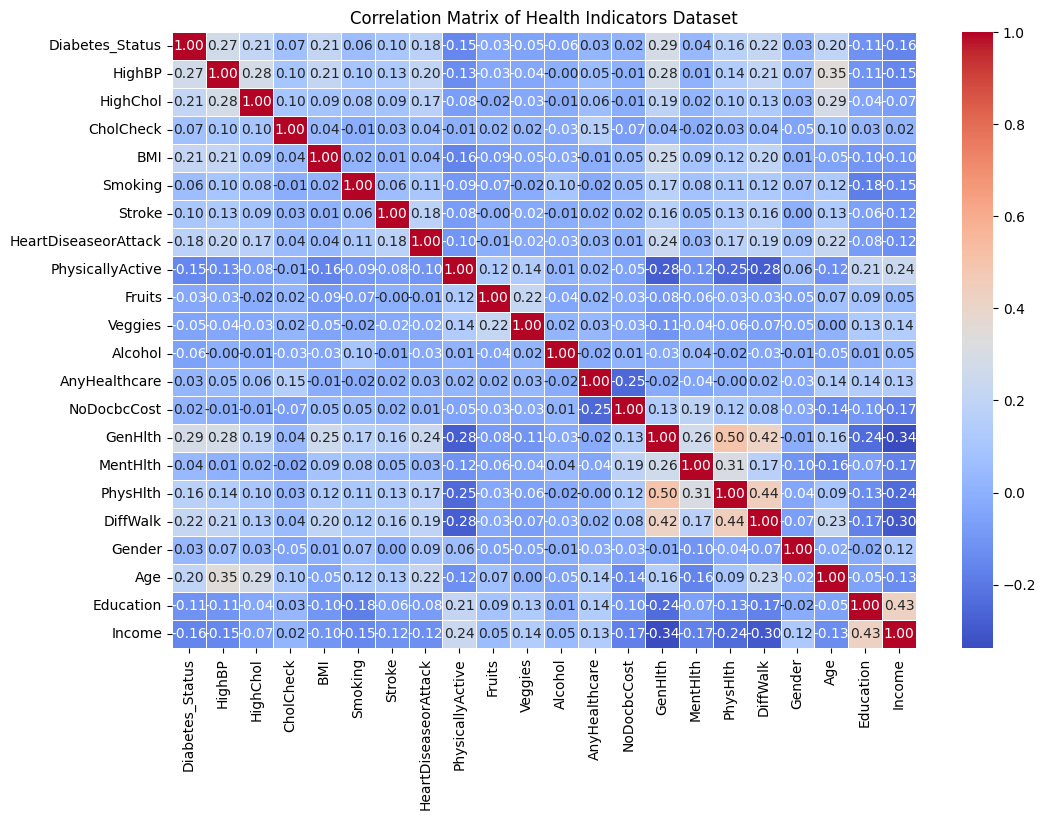

   Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoking  Stroke  \
0              0.0       0       1.0          1  15.0      1.0     0.0   
1              2.0       1       0.0          1  28.0      0.0     0.0   
2              2.0       1       1.0          1  33.0      0.0     0.0   
3              2.0       0       1.0          1  29.0      0.0     1.0   
4              0.0       0       0.0          1  24.0      1.0     0.0   

   HeartDiseaseorAttack  PhysicallyActive  Fruits  ...  AnyHealthcare  \
0                   0.0                 0       1  ...              1   
1                   1.0                 0       1  ...              1   
2                   0.0                 1       1  ...              1   
3                   1.0                 1       1  ...              1   
4                   0.0                 0       0  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Gender  Age  Education  \
0          0.0      5.0      10.0  

In [ ]:
# Load dataset
health_indicators_dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2021.csv')

health_indicators_dataset = health_indicators_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Rename the outcome column to 'Diabetes_Status'

health_indicators_dataset.rename(columns={'Diabetes_012': 'Diabetes_Status'}, inplace=True)

# Rename the 'Sex' column to 'Gender
health_indicators_dataset.rename(columns={'Sex': 'Gender'}, inplace=True)

# Rename the 'PhysActivity" column to "PhysicallyActive"
health_indicators_dataset.rename(columns={'PhysActivity': 'PhysicallyActive'}, inplace=True)

# Rename the "Smoker" and "HvyHvyAlcoholConsump" to "Smoking" and "Alcohol" respectively
health_indicators_dataset.rename(columns={'Smoker': 'Smoking', 'HvyAlcoholConsump': 'Alcohol'}, inplace=True)

# Compute the correlation matrix
correlation_matrix = health_indicators_dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators Dataset')
plt.show()

# printing the head of the dataset
print(health_indicators_dataset.head())

Import Gestational Diabetes Dataset and Print Out Correlation Matrix: [Dataset Link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

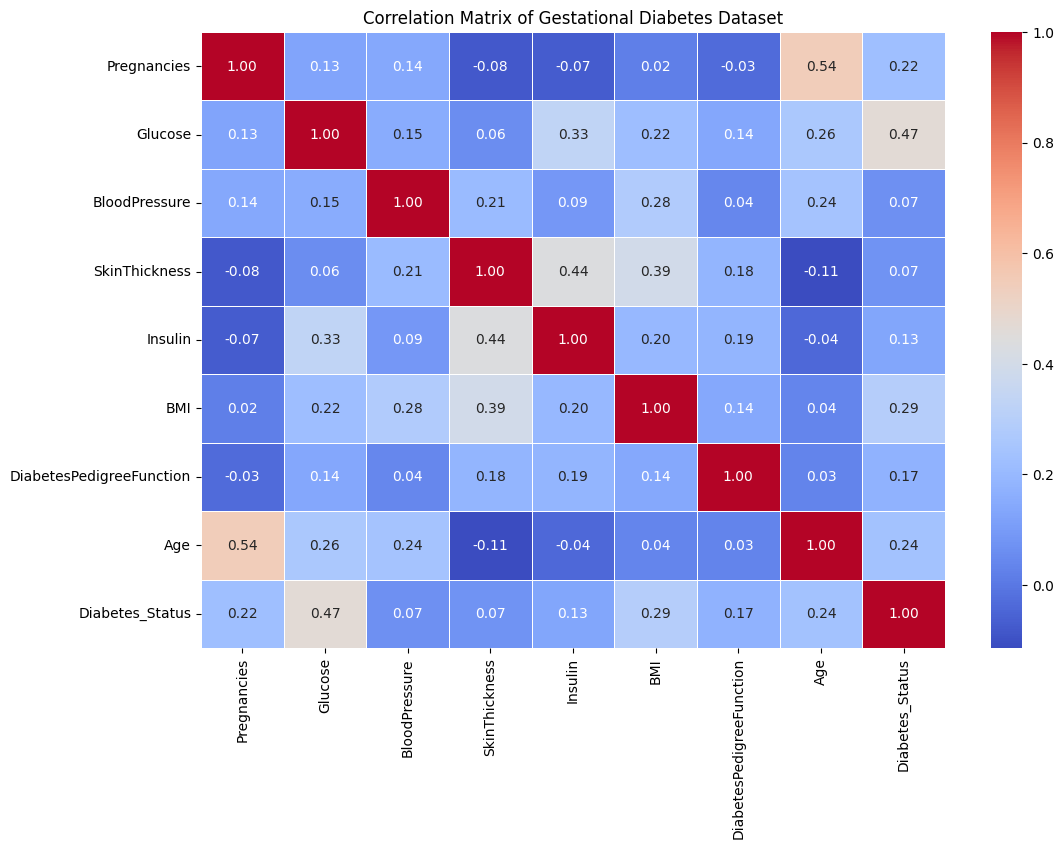

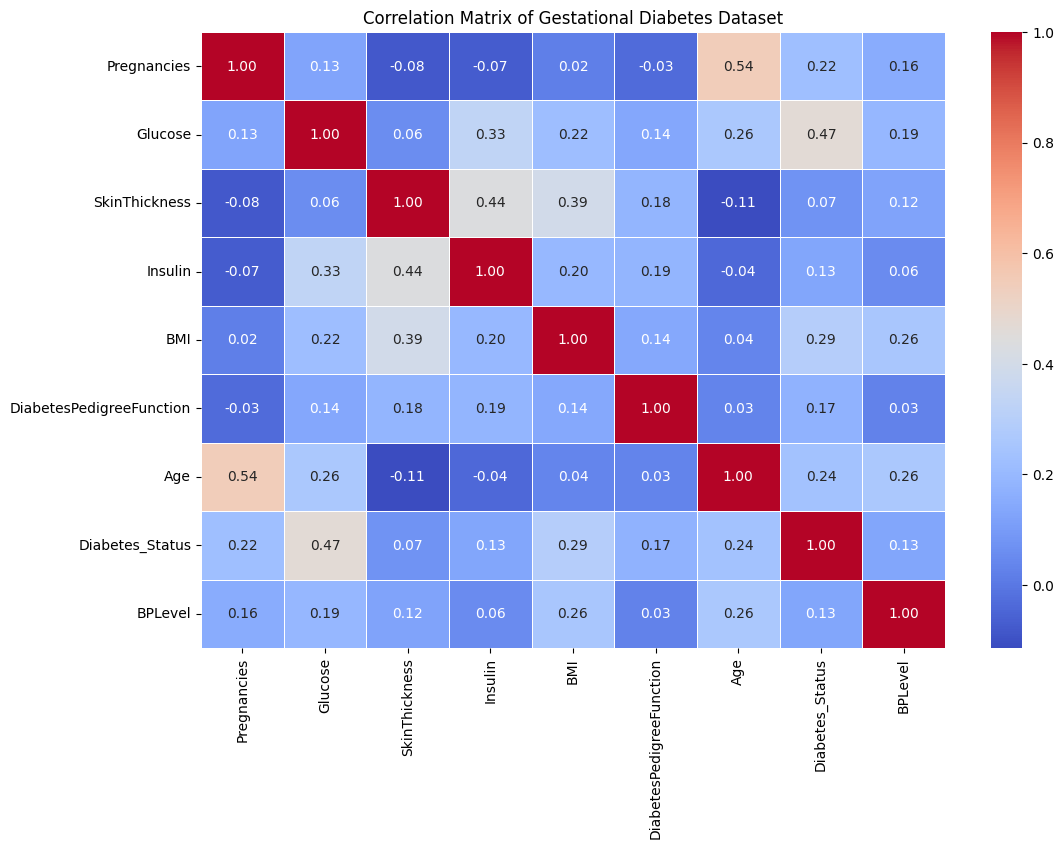

   Pregnancies  Glucose  SkinThickness  Insulin   BMI  \
0            6      148             35        0  33.6   
1            1       85             29        0  26.6   
2            8      183              0        0  23.3   
3            1       89             23       94  28.1   
4            0      137             35      168  43.1   

   DiabetesPedigreeFunction  Age  Diabetes_Status  BPLevel  
0                     0.627   50                3        1  
1                     0.351   31                0        1  
2                     0.672   32                3        1  
3                     0.167   21                0        1  
4                     2.288   33                3        0  


In [ ]:
# load dataset
gestational_diabetes_dataset = pd.read_csv('gestational_diabetes_dataset.csv')

gestational_diabetes_dataset = gestational_diabetes_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Rename the outcome column to 'Diabetes_Status' and map values of 1 to 3
gestational_diabetes_dataset.rename(columns={'Outcome': 'Diabetes_Status'}, inplace=True)
gestational_diabetes_dataset['Diabetes_Status'] = gestational_diabetes_dataset['Diabetes_Status'].map({0: 0, 1: 3})

# Compute the correlation matrix
correlation_matrix = gestational_diabetes_dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Gestational Diabetes Dataset')
plt.show()

# Define a function to classify BP levels based only on Diastolic BP
def classify_bp(row):
    dia_bp = row['BloodPressure']

    if dia_bp < 60:
        return 0  # Low BP
    elif 60 <= dia_bp <= 80:
        return 1  # Normal BP
    else:
        return 2  # High BP

# Apply the function to create the 'BPLevel' column based on diastolic pressure
gestational_diabetes_dataset['BPLevel'] = gestational_diabetes_dataset.apply(classify_bp, axis=1)

# Remove the 'Dia BP' column (and 'Sys BP' if no longer needed)
gestational_diabetes_dataset.drop(['BloodPressure'], axis=1, inplace=True)

# Compute the correlation matrix
correlation_matrix = gestational_diabetes_dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Gestational Diabetes Dataset')
plt.show()



# printing the head of the dataset
print(gestational_diabetes_dataset.head())

Import Another Dataset with more samples: [Dataset Link](https://github.com/steve-zeyu-zhang/DiabetesDiagnosis/blob/main/data/BIT_2019.csv)

Diabetes_Status
No Diabetes        684
Type-2 Diabetes    188
Unknown             66
Prediabetes         14
Name: count, dtype: int64
Mapping for column 'Gender':
Female --> 0
Male --> 1

Mapping for column 'Family_Diabetes':
no --> 0
yes --> 1

Mapping for column 'HighBP':
no --> 0
yes --> 1

Mapping for column 'PhysicallyActive':
less than half an hr --> 0
more than half an hr --> 1
none --> 2
one hr or more --> 3

Mapping for column 'Smoking':
no --> 0
yes --> 1

Mapping for column 'Alcohol':
no --> 0
yes --> 1

Mapping for column 'RegularMedicine':
no --> 0
yes --> 1

Mapping for column 'JunkFood':
always --> 0
occasionally --> 1
often --> 2
very often --> 3

Mapping for column 'Stress':
always --> 0
not at all --> 1
sometimes --> 2
very often --> 3

Mapping for column 'BPLevel':
high --> 0
low --> 1
normal --> 2

Mapping for column 'UriationFreq':
not much --> 0
quite often --> 1

Mapping for column 'Diabetic':
no --> 0
yes --> 1

Mapping for column 'Diabetes_Status':
No Diabetes 

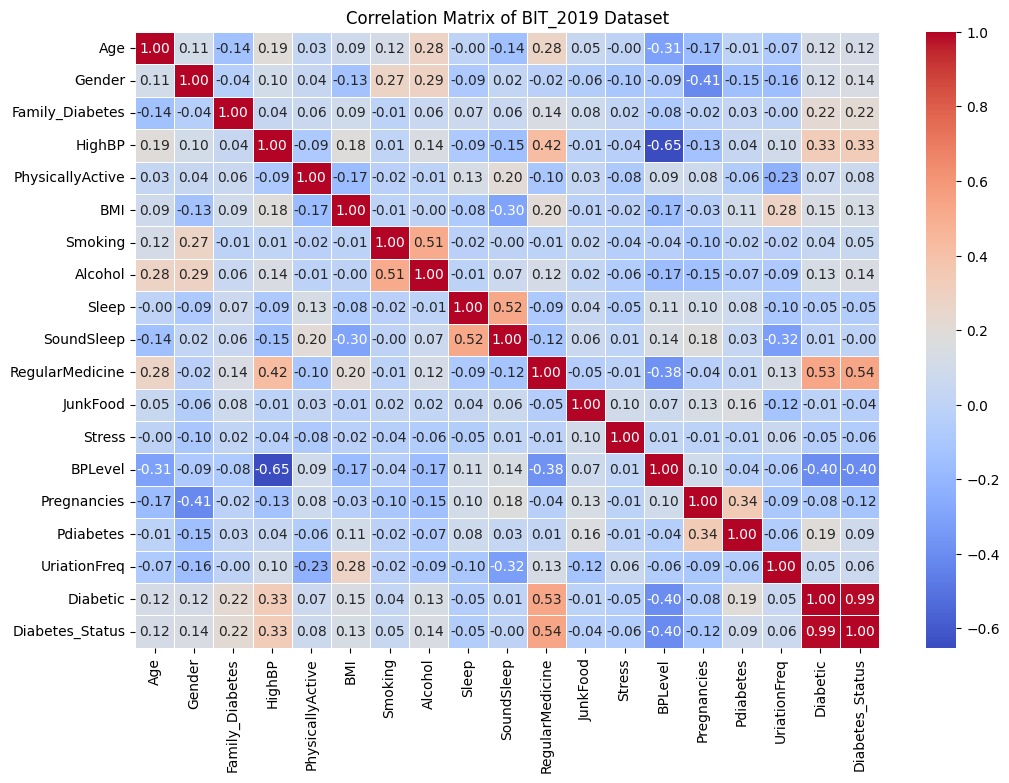

    Age  Gender  Family_Diabetes  HighBP  PhysicallyActive   BMI  Smoking  \
0  54.0       1                0       1                 3  39.0        0   
1  54.0       1                0       1                 0  28.0        0   
2  44.0       1                0       0                 3  24.0        0   
3  54.0       1                0       0                 3  23.0        0   
4  44.0       1                0       0                 0  27.0        0   

   Alcohol  Sleep  SoundSleep  RegularMedicine  JunkFood  Stress  BPLevel  \
0        0      8           6                0         1       2        0   
1        0      8           6                1         3       2        2   
2        0      6           6                0         1       2        2   
3        0      8           6                0         1       2        2   
4        0      8           8                0         1       2        2   

   Pregnancies  Pdiabetes  UriationFreq  Diabetic  Diabetes_Status  
0    

In [ ]:
# import dataset
bit_2019_dataset = pd.read_csv('BIT_2019.csv')

bit_2019_dataset = bit_2019_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# rename column "highBP" to HighBP
bit_2019_dataset.rename(columns={'highBP': 'HighBP'}, inplace=True)

# rename column "Pregancies" to "Pregnancies"
bit_2019_dataset.rename(columns={'Pregancies': 'Pregnancies'}, inplace=True)

bit_2019_dataset['BPLevel'] = bit_2019_dataset['BPLevel'].str.lower()
# Strip any leading or trailing whitespace in the 'BPLevel' column
bit_2019_dataset['BPLevel'] = bit_2019_dataset['BPLevel'].str.strip()

# Function to classify diabetes status based on Diabetic, Pdiabetes, and Pregancies columns
def classify_diabetes(row):
    if row['Diabetic'] == 'no' and row['Pdiabetes'] == 0:
        return 'No Diabetes'
    elif row['Pdiabetes'] == 1:
        return 'Prediabetes'
    elif row['Diabetic'] == 'yes' and row['Pregnancies'] == 0:
        return 'Type-2 Diabetes'
    elif row['Diabetic'] == 'yes' and row['Pregnancies'] > 0 and row['Gender'] == 0: # only females
        return 'Gestational Diabetes'
    else:
        return 'Unknown'

# Fill missing values in 'Pdiabetes' and 'Diabetic' columns
bit_2019_dataset['Pdiabetes'].fillna('0', inplace=True)  # Assuming no prediabetes for missing values
bit_2019_dataset['Diabetic'].fillna('no', inplace=True)  # Assuming no diabetes for missing values

# Standardize the 'Pdiabetes' column to binary format (0 for no, 1 for yes)
bit_2019_dataset['Pdiabetes'] = bit_2019_dataset['Pdiabetes'].replace({'yes': 1, 'no': 0, '0': 0}).astype(int)

# Apply the classification function to create the target column 'Diabetes_Status'
bit_2019_dataset['Diabetes_Status'] = bit_2019_dataset.apply(classify_diabetes, axis=1)

# Check the distribution of the newly created 'Diabetes_Status' column
print(bit_2019_dataset['Diabetes_Status'].value_counts())

# Drop rows where 'Diabetes_Status' is 'Unknown'
bit_2019_dataset = bit_2019_dataset[bit_2019_dataset['Diabetes_Status'] != 'Unknown']


# Define a function to convert age ranges to numeric values (e.g., using the midpoint of the range)
def convert_age_range(age_range):
    if isinstance(age_range, str) and '-' in age_range:
        age_min, age_max = age_range.split('-')
        return (int(age_min) + int(age_max)) // 2
    else:
        return pd.to_numeric(age_range, errors='coerce')  # Handle any non-range values

# Apply the function to the Age column
bit_2019_dataset['Age'] = bit_2019_dataset['Age'].apply(convert_age_range)

# Identify all columns with 'object' dtype (categorical columns)
categorical_columns = bit_2019_dataset.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    bit_2019_dataset[column] = label_encoder.fit_transform(bit_2019_dataset[column])
    # Print the mapping of original values to encoded values
    print(f"Mapping for column '{column}':")
    for i, item in enumerate(label_encoder.classes_):
        print(f"{item} --> {i}")
    print()  # Just to add a blank line between mappings

# Compute the correlation matrix
correlation_matrix = bit_2019_dataset.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of BIT_2019 Dataset')
plt.show()

# printing the head of the dataset
print(bit_2019_dataset.head())

Import Another Dataset for Gestational Diabetes Classification: [Dataset Link](https://www.kaggle.com/datasets/sumathisanthosh/gestational-diabetes-mellitus-gdm-data-set?select=Gestational+Diabetic+Dat+Set.xlsx)

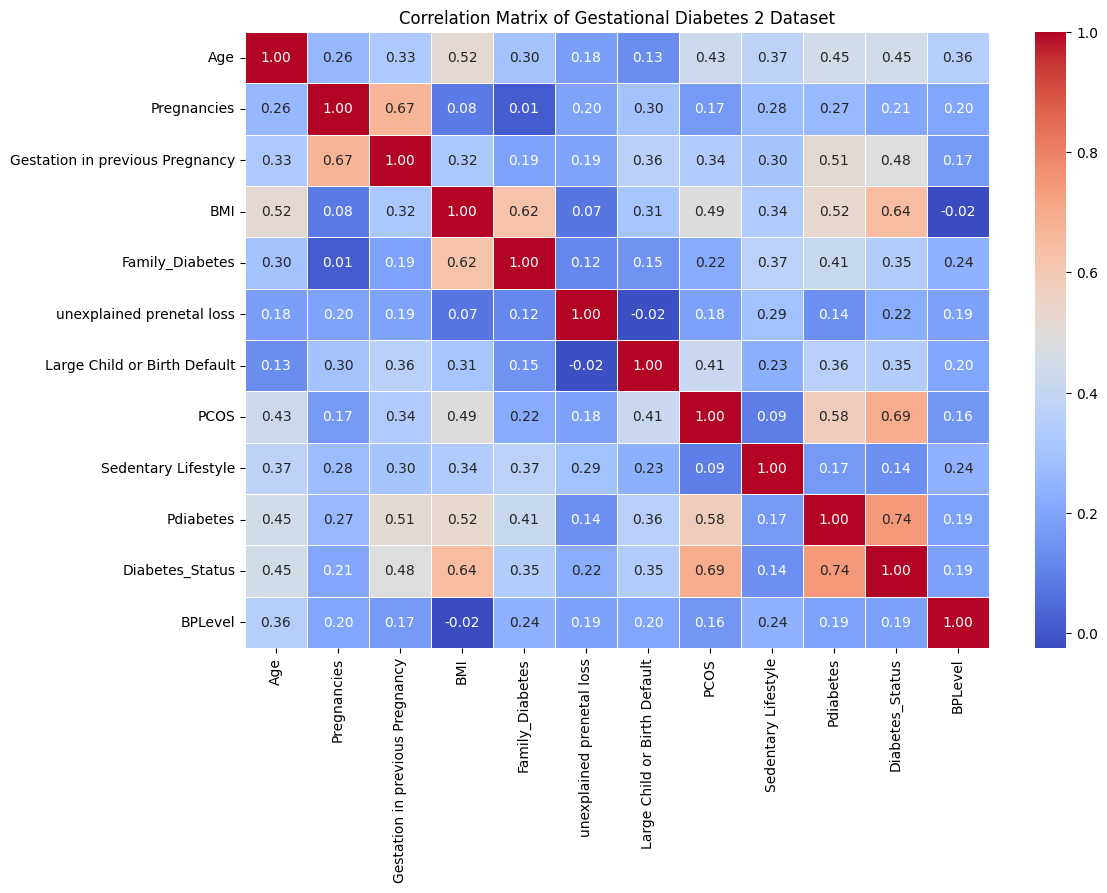

   Age  Pregnancies  Gestation in previous Pregnancy  BMI  Family_Diabetes  \
0   22            2                                1  NaN                0   
1   26            2                                1  NaN                0   
2   29            1                                0  NaN                0   
3   28            2                                1  NaN                0   
4   21            2                                1  NaN                0   

   unexplained prenetal loss  Large Child or Birth Default  PCOS  \
0                          0                             0     0   
1                          0                             0     0   
2                          0                             0     0   
3                          0                             0     0   
4                          0                             0     0   

   Sedentary Lifestyle  Pdiabetes  Diabetes_Status  BPLevel  
0                    0          0                0        1 

In [ ]:
# import dataset
gestational_diabetes_dataset2 = pd.read_excel('gestational_diabetes_dataset2.xlsx')

gestational_diabetes_dataset2 = gestational_diabetes_dataset2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


# drop columns that are unnecessary for training
columns_to_drop = ["Case Number", "OGTT", "HDL", "Hemoglobin"]
gestational_diabetes_dataset2.drop(columns=columns_to_drop, inplace=True)

# Rename "No of Pregnancy" column to "Pregnancies", "Class Label(GDM /Non GDM)" to "Diabetes_Status", "Prediabetes" column to "Pdiabetes", "Family History" to "Family_Diabetes"
gestational_diabetes_dataset2.rename(columns={'No of Pregnancy': 'Pregnancies'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Class Label(GDM /Non GDM)': 'Diabetes_Status'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Prediabetes': 'Pdiabetes'}, inplace=True)
gestational_diabetes_dataset2.rename(columns={'Family History': 'Family_Diabetes'}, inplace=True)


gestational_diabetes_dataset2['Diabetes_Status'] = gestational_diabetes_dataset2['Diabetes_Status'].map({0: 0, 1: 3})

def classify_bp(row):
    sys_bp = row['Sys BP']
    dia_bp = row['Dia BP']

    if sys_bp < 90 or dia_bp < 60:
        return 0  # Low BP
    elif 90 <= sys_bp <= 120 and 60 <= dia_bp <= 80:
        return 1  # Normal BP
    else:
        return 2  # High BP

# Apply the function to create the 'BPLevel' column
gestational_diabetes_dataset2['BPLevel'] = gestational_diabetes_dataset2.apply(classify_bp, axis=1)

# Remove the 'Sys BP' and 'Dia BP' columns
gestational_diabetes_dataset2.drop(['Sys BP', 'Dia BP'], axis=1, inplace=True)

# Compute the correlation matrix
correlation_matrix = gestational_diabetes_dataset2.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Gestational Diabetes 2 Dataset')
plt.show()


print(gestational_diabetes_dataset2.head())

Separating all datasets into 2 different ones: one for female samples and one for male samples

In [ ]:
# Separating datasets into male and female sample categories
female_data = pd.concat([bit_2019_dataset[bit_2019_dataset['Gender'] == 0],
                         health_indicators_dataset[health_indicators_dataset['Gender'] == 0],
                         gestational_diabetes_dataset, gestational_diabetes_dataset2], axis=0)
male_data = pd.concat([bit_2019_dataset[bit_2019_dataset['Gender'] == 1],
                       health_indicators_dataset[health_indicators_dataset['Gender'] == 1]], axis=0)

Check Distribution of Classes (We will have to use SMOTE or ADASYN to balance)

In [ ]:
# Check the distribution of Diabetes_Status in the male dataset to confirm no '3's (gestational diabetes)
print("==== Male Data ====")
print(male_data['Diabetes_Status'].value_counts())

# Check the distribution of Diabetes_Status in the female dataset
print("==== Female Data ====")
print(female_data['Diabetes_Status'].value_counts())

==== Male Data ====
Diabetes_Status
0.0    93258
2.0    17616
1.0     2650
Name: count, dtype: int64
==== Female Data ====
Diabetes_Status
0.0    107270
2.0     16140
1.0      2983
3.0      1640
Name: count, dtype: int64


Remove Unnecessary Columns for Training

In [ ]:
'''
drop columns "Gender",
HighChol", "CholCheck", "Stroke",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MenHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Glucose", "SkinThickness", "Insulin", "Diabetes_Pedigree_Function", "Pdiabetes"
from male and female dataframes
'''
columns_to_drop_female = ["Gender", "HighChol", "CholCheck", "Stroke",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Glucose", "SkinThickness", "Insulin", "Pdiabetes", "DiabetesPedigreeFunction", "Diabetic"]

columns_to_drop_male = ["Gender", "HighChol", "CholCheck", "Stroke", "Diabetic", "Pregnancies",
"HeartDiseaseorAttack", "Fruits",
"Veggies", "AnyHealthcare", "NoDocbcCost",
"GenHlth", "MentHlth", "PhysHlth", "DiffWalk",
"Education", "Income", "Pdiabetes"]

# Drop the specified columns from the male and female dataframes
female_data.drop(columns=columns_to_drop_female, inplace=True)
male_data.drop(columns=columns_to_drop_male, inplace=True)


In [ ]:
# Check class distribution again
print("==== Female Data ====")
print(female_data['Diabetes_Status'].value_counts())

# Check the distribution of Diabetes_Status in the male dataset
print("==== Male Data ====")
print(male_data['Diabetes_Status'].value_counts())

# save female data and male data to csv files
female_data.to_csv('female_data.csv', index=False)
male_data.to_csv('male_data.csv', index=False)

==== Female Data ====
Diabetes_Status
0.0    107270
2.0     16140
1.0      2983
3.0      1640
Name: count, dtype: int64
==== Male Data ====
Diabetes_Status
0.0    93258
2.0    17616
1.0     2650
Name: count, dtype: int64


impute missing data

In [ ]:
!pip install tqdm

In [ ]:
import pandas as pd
import logging
from sklearn.impute import KNNImputer
from tqdm import tqdm  # For progress bar

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the datasets
logging.info('Loading datasets...')
print('Loading datasets...')  # Add print for testing
male_data = pd.read_csv('male_data.csv')
female_data = pd.read_csv('female_data.csv')

# Save the column names before imputation
male_columns = male_data.columns
female_columns = female_data.columns

# Initialize the imputers
knn_imputer = KNNImputer(n_neighbors=5)  # KNN for imputation

# Apply KNN Imputation on numerical data
logging.info('Applying KNN imputation on male dataset...')
print('Applying KNN imputation on male dataset...')  # Add print for testing
male_data = knn_imputer.fit_transform(male_data)

logging.info('Applying KNN imputation on female dataset...')
print('Applying KNN imputation on female dataset...')  # Add print for testing
female_data = knn_imputer.fit_transform(female_data)

# Convert the imputed arrays back to DataFrames with original column names
male_data = pd.DataFrame(male_data, columns=male_columns)
female_data = pd.DataFrame(female_data, columns=female_columns)

# Save the imputed data
logging.info('Saving imputed male dataset...')
print('Saving imputed male dataset...')  # Add print for testing
male_data.to_csv('imputed_male_data.csv', index=False)

logging.info('Saving imputed female dataset...')
print('Saving imputed female dataset...')  # Add print for testing
female_data.to_csv('imputed_female_data.csv', index=False)

logging.info('Imputation process complete.')
print('Imputation process complete.')  # Add print for testing


Loading datasets...
Applying KNN imputation on male dataset...
Applying KNN imputation on female dataset...
Saving imputed male dataset...
Saving imputed female dataset...
Imputation process complete.


Rounding the values in the data (in case imputation was not perfect)

In [ ]:
import pandas as pd
# import imputed datasets
male_data = pd.read_csv('imputed_male_data.csv')
female_data = pd.read_csv('imputed_female_data.csv')

male_data = male_data.round()
female_data = female_data.round()

# save the rounded datasets
male_data.to_csv('imputed_male_data.csv', index=False)
female_data.to_csv('imputed_female_data.csv', index=False)

Printing value counts of each column in each imputed dataset (male and female)

In [ ]:
# Print value counts for all columns in the male dataset
print("Value counts for male dataset:")
for column in male_data.columns:
    print(f"\nColumn: {column}")
    print(male_data[column].value_counts())

# Print value counts for all columns in the female dataset
print("\nValue counts for female dataset:")
for column in female_data.columns:
    print(f"\nColumn: {column}")
    print(female_data[column].value_counts())


Value counts for male dataset:

Column: Age
Age
10.0    13557
9.0     13031
11.0    11963
8.0     11340
7.0     10231
6.0      8330
5.0      8196
12.0     7602
4.0      7570
13.0     6945
3.0      6290
2.0      4598
1.0      3648
44.0      104
54.0       92
50.0        9
48.0        4
35.0        4
45.0        4
52.0        3
36.0        2
37.0        1
Name: count, dtype: int64

Column: Family_Diabetes
Family_Diabetes
0.0    59410
1.0    54114
Name: count, dtype: int64

Column: HighBP
HighBP
0.0    62173
1.0    51351
Name: count, dtype: int64

Column: PhysicallyActive
PhysicallyActive
1.0    91051
0.0    22265
3.0      136
2.0       72
Name: count, dtype: int64

Column: BMI
BMI
27.0    10782
26.0     9896
24.0     9261
28.0     8860
30.0     7890
        ...  
94.0        1
82.0        1
84.0        1
88.0        1
90.0        1
Name: count, Length: 80, dtype: int64

Column: Smoking
Smoking
0.0    62598
1.0    50926
Name: count, dtype: int64

Column: Alcohol
Alcohol
0.0    106506
1.0 

Finding best features for both male and female datasets for training

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X_male = male_data.drop('Diabetes_Status', axis=1)  # Replace 'target_column' with your actual target column name
y_male = male_data['Diabetes_Status']

# Split the data into train and test sets
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote_male, y_train_smote_male = smote.fit_resample(X_train_male, y_train_male)

# Initialize a Random Forest Classifier
classifier = RandomForestClassifier()

# Apply Recursive Feature Elimination (RFE) after SMOTE
rfe = RFE(estimator=classifier, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train_smote_male, y_train_smote_male)

# Get the selected features
selected_features_male = X_male.columns[rfe.support_]
print("Selected Features:", selected_features_male)


Selected Features: Index(['Age', 'HighBP', 'PhysicallyActive', 'BMI', 'Smoking', 'Sleep',
       'SoundSleep', 'RegularMedicine', 'Stress', 'BPLevel'],
      dtype='object')


In [ ]:
# Split the dataset into features (X) and target (y)
X_female = female_data.drop('Diabetes_Status', axis=1)  # Replace 'target_column' with your actual target column name
y_female = female_data['Diabetes_Status']

# Split the data into train and test sets
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote_female, y_train_smote_female = smote.fit_resample(X_train_female, y_train_female)

# Initialize a Random Forest Classifier
classifier = RandomForestClassifier()

# Apply Recursive Feature Elimination (RFE) after SMOTE
rfe = RFE(estimator=classifier, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train_smote_female, y_train_smote_female)

# Get the selected features
selected_features_female = X_female.columns[rfe.support_]
print("Selected Features:", selected_features_female)

Selected Features: Index(['Age', 'HighBP', 'PhysicallyActive', 'BMI', 'Sleep', 'SoundSleep',
       'BPLevel', 'Pregnancies', 'Gestation in previous Pregnancy', 'PCOS'],
      dtype='object')


In [ ]:
import xgboost as xgb

# Train XGBoost Model for Male Dataset

# Use only the selected features
X_train_male_selected = X_train_smote_male[selected_features_male]
X_test_male_selected = X_test_male[selected_features_male]

# Initialize and train the XGBoost model for Male Dataset
xgb_model_male = xgb.XGBClassifier(device='cuda')
xgb_model_male.fit(X_train_male_selected, y_train_smote_male)

# Evaluate the model on the male test set
accuracy_male = xgb_model_male.score(X_test_male_selected, y_test_male)
print("Male Dataset XGBoost Model Accuracy:", accuracy_male)


# Train XGBoost Model for Female Dataset

# Use only the selected features
X_train_female_selected = X_train_smote_female[selected_features_female]
X_test_female_selected = X_test_female[selected_features_female]

# Initialize and train the XGBoost model for Female Dataset
xgb_model_female = xgb.XGBClassifier(device='cuda')
xgb_model_female.fit(X_train_female_selected, y_train_smote_female)

# Evaluate the model on the female test set
accuracy_female = xgb_model_female.score(X_test_female_selected, y_test_female)
print("Female Dataset XGBoost Model Accuracy:", accuracy_female)


NameError: name 'X_train_smote_male' is not defined

In [ ]:
import xgboost as xgb

# Load XGBoost models saved with save_model() method
xgb_model_female = xgb.Booster()
xgb_model_female.load_model('/content/xgboost_female.bin')

xgb_model_male = xgb.Booster()
xgb_model_male.load_model('/content/xgboost_male.bin')

print("XGBoost models loaded successfully!")



XGBoost models loaded successfully!


In [ ]:
# Edit the imputed data csv files to only include selected features

import pandas as pd

male_df = pd.read_csv('imputed_male_data.csv')
female_df = pd.read_csv('imputed_female_data.csv')

selected_features_female = female_df[['Age', 'HighBP', 'PhysicallyActive', 'BMI', 'Sleep', 'SoundSleep',
       'BPLevel', 'Pregnancies', 'Gestation in previous Pregnancy', 'PCOS', 'Diabetes_Status']]
selected_features_male = male_df[['Age', 'HighBP', 'PhysicallyActive', 'BMI', 'Smoking', 'Sleep',
       'SoundSleep', 'RegularMedicine', 'Stress', 'BPLevel', 'Diabetes_Status']]

selected_features_female.to_csv('imputed_female_data.csv', index=False)
selected_features_male.to_csv('imputed_male_data.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the female dataset
print("Loading the female dataset...")
female_data = pd.read_csv('imputed_female_data.csv')
print(f"Dataset loaded with {female_data.shape[0]} rows and {female_data.shape[1]} columns.")

# Split the dataset into features (X) and target (y)
X_female = female_data.drop('Diabetes_Status', axis=1)
y_female = female_data['Diabetes_Status']
print(f"Features shape: {X_female.shape}, Target shape: {y_female.shape}")

# Split the data into train and test sets
print("Splitting the data into training and test sets...")
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.2, random_state=42
)
print(f"Training set: {X_train_female.shape}, Test set: {X_test_female.shape}")

# Apply SMOTE to the training set
print("Applying SMOTE to balance the dataset...")
smote = SMOTE(random_state=42)
X_train_smote_female, y_train_smote_female = smote.fit_resample(X_train_female, y_train_female)
print(f"Resampled Training set: {X_train_smote_female.shape}")

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
print("Parameter grid for hyperparameter tuning defined.")

# Create a new XGBoost model
xgb_model_female_new = xgb.XGBClassifier()
print("Initialized new XGBoost model with GPU support and high verbosity.")

# Use GridSearchCV to find the best hyperparameters
print("Starting GridSearchCV for hyperparameter tuning...")
grid_search = GridSearchCV(
    estimator=xgb_model_female_new,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2, # Increase verbosity to track search progress
    error_score='raise'  # Raise errors to debug
)
grid_search.fit(X_train_smote_female, y_train_smote_female)

# Get the best model and its parameters
best_xgb_model_female = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
print("Evaluating the best model on the test set...")
y_pred_female = best_xgb_model_female.predict(X_test_female)
accuracy_female_new = accuracy_score(y_test_female, y_pred_female)
print(f"Improved Female Dataset XGBoost Model Accuracy: {accuracy_female_new:.4f}")

# Set an accuracy threshold
accuracy_threshold = 0.88
print(f"Accuracy threshold is set to {accuracy_threshold}")

# Save the model only if it meets the accuracy threshold
if accuracy_female_new >= accuracy_threshold:
    print(f"Model accuracy {accuracy_female_new:.4f} is above the threshold. Saving the model...")
    best_xgb_model_female.save_model('improved_xgboost_female.bin')
    print("Model saved successfully.")
else:
    print(f"Model accuracy {accuracy_female_new:.4f} is below the threshold. Model not saved.")

Loading the female dataset...
Dataset loaded with 128033 rows and 11 columns.
Features shape: (128033, 10), Target shape: (128033,)
Splitting the data into training and test sets...
Training set: (102426, 10), Test set: (25607, 10)
Applying SMOTE to balance the dataset...
Resampled Training set: (343492, 10)
Parameter grid for hyperparameter tuning defined.
Initialized new XGBoost model with GPU support and high verbosity.
Starting GridSearchCV for hyperparameter tuning...
Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   3.0s

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import tensorflow as tf

# Load merged_CGM_clinical_data.csv
CGM_data = pd.read_csv('merged_CGM_clinical_data.csv')

# Print head of CGM_data
print(CGM_data.head())

# Remove every column besides "Hora", "Glucemia", and "T2DM". Make sure to only include the female samples (gender = 0)
CGM_data = CGM_data[CGM_data["gender"] == 0]
CGM_data = CGM_data[["Patient_ID", "Hora", "Glucemia", "T2DM"]]

# Label encode T2DM: 0 - False, 1 - True
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
CGM_data["T2DM"] = encoder.fit_transform(CGM_data["T2DM"])

CGM_data = CGM_data.rename(columns={"T2DM": "Diabetes_Status"})

# Preprocess data
CGM_data['Hora'] = pd.to_timedelta(CGM_data['Hora']).dt.total_seconds()
CGM_data = CGM_data.dropna()

# Define numerical columns
numerical_columns = ['Hora', 'Glucemia']

# Normalize numerical columns
scaler = MinMaxScaler()
CGM_data[numerical_columns] = scaler.fit_transform(CGM_data[numerical_columns])

# Handle class imbalance by oversampling the minority class
from sklearn.utils import resample
minority_class = CGM_data[CGM_data['Diabetes_Status'] == 1]
majority_class = CGM_data[CGM_data['Diabetes_Status'] == 0]

minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
balanced_data = pd.concat([majority_class, minority_upsampled])

# Map Diabetes_Status values for clarity
diabetes_status_mapping = {0: 0, 1: 2}

balanced_data_csv = balanced_data.to_csv('CGM_Data_female.csv')


   Patient_ID      Hora  Glucemia  gender  age   BMI  glycaemia  HbA1c  \
0           1  00:00:00      87.0       1   77  25.4        106    6.3   
1           1  00:00:03      95.0       1   77  25.4        106    6.3   
2           1  00:00:05     104.0       1   77  25.4        106    6.3   
3           1  00:00:06     159.0       1   77  25.4        106    6.3   
4           1  00:00:07     114.0       1   77  25.4        106    6.3   

   follow.up   T2DM  
0      413.0  False  
1      413.0  False  
2      413.0  False  
3      413.0  False  
4      413.0  False  


Trial 5 Complete [00h 07m 28s]
val_accuracy: 0.9245133996009827

Best val_accuracy So Far: 0.9685691595077515
Total elapsed time: 00h 37m 24s
Epoch 1/50
950/951 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5800 - loss: 3.0802
Epoch 1: val_accuracy improved from -inf to 0.67399, saving model to /content/best_model.keras
951/951 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5801 - loss: 3.0799 - val_accuracy: 0.6740 - val_loss: 2.6088 - learning_rate: 1.0000e-05
Epoch 2/50
943/951 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6826 - loss: 2.4470
Epoch 2: val_accuracy improved from 0.67399 to 0.76696, saving model to /content/best_model.keras
951/951 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6829 - loss: 2.4456 - val_accuracy: 0.7670 - val_loss: 2.0159 - learning_rate: 1.0000e-05
Epoch 3/50
945/951 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7703 - loss: 1.9146
Epoch 3: val_accuracy improved from 0.76696 to 0.77196, saving model to /content/best_model.keras
951/951 ━━━━━━━━━━

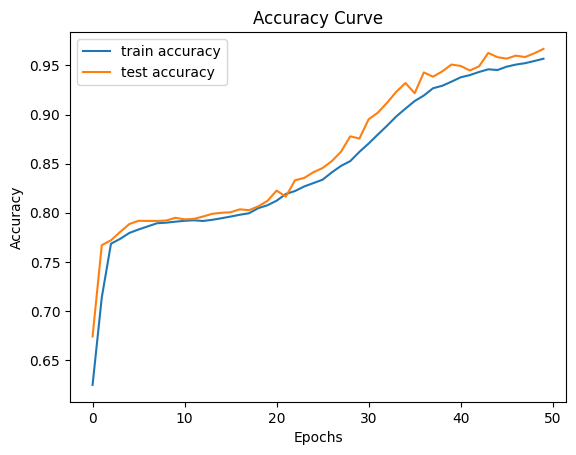

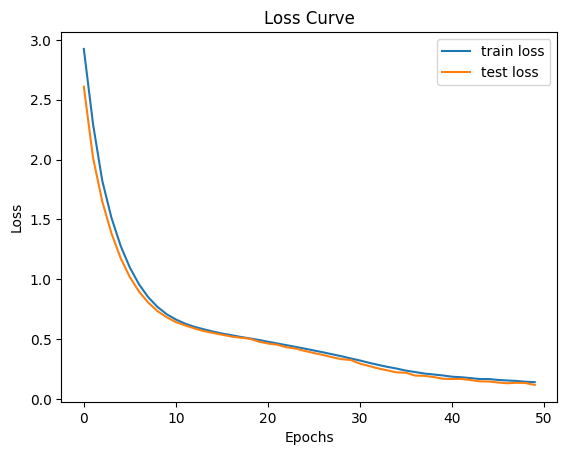

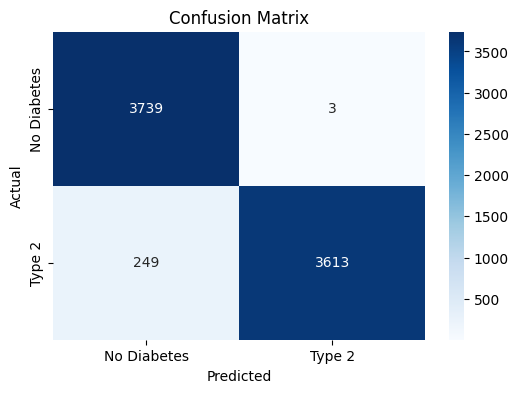

In [ ]:
# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Define input shape with multiple timesteps
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32), return_sequences=True))  # Units in LSTM layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))  # Dropout rate
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=256, step=32)))  # Units in LSTM layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))  # Dropout rate
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', kernel_regularizer=l2(0.01)))  # Dense layer units
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    directory='my_dir',  # Directory to store results
    project_name='lstm_hyperparameter_opt'  # Name for this tuning project
)

# Directory to save the best model
checkpoint_dir = 'model_checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Set up the ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, '/content/best_dl_model_female.keras'),
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the model with the best validation accuracy
    mode='max',  # Maximize accuracy
    verbose=1
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr, checkpoint_callback])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters and save the best model during training
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr, checkpoint_callback])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Load the best saved model
best_model = tf.keras.models.load_model(os.path.join(checkpoint_dir, '/content/best_model.keras'))

# Make predictions using the best model
y_pred = (best_model.predict(X_test) > 0.5).astype(int)

# Plot the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Type 2'], yticklabels=['No Diabetes', 'Type 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
# imputing missing values in CGM dataset to correspond with imputed female dataset

import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

# Load the CGM data
print("Loading CGM data...")
cgm_data = pd.read_csv('CGM_Data_female.csv')
print("CGM data loaded successfully.")

# Step 1: Identify patients with missing 'Hora' or 'Glucemia'
print("Identifying patients with missing 'Hora' or 'Glucemia'...")
missing_data_patients = cgm_data[cgm_data['Hora'].isna() | cgm_data['Glucemia'].isna()]['Patient_ID'].unique()
print(f"Patients with missing data: {len(missing_data_patients)} patients")

# Step 2: Create a time series template for 'Hora' normalized to [0, 1]
print("Creating time series template for 'Hora' with 50 time points...")
num_time_points = 50  # Adjust to the desired number of time points
time_interval = 10  # Time interval in seconds (e.g., every 10 seconds)
# Normalized Hora values based on the total time covered by the intervals
hora_template = np.linspace(0, 1, num_time_points)  # Normalized to [0, 1]

# Step 3: Create a new DataFrame for the imputed values
imputed_rows = []

# Function to generate new entries for each patient
def generate_entries_for_patient(patient_id):
    patient_data = cgm_data[cgm_data['Patient_ID'] == patient_id]

    # If all 'Hora' values are missing, fill with the template
    if patient_data['Hora'].isna().all():
        # Add variability to Glucemia values
        mean_glucemia = patient_data['Glucemia'].mean() if not patient_data['Glucemia'].isna().all() else 0.2
        std_dev_glucemia = patient_data['Glucemia'].std() if not patient_data['Glucemia'].isna().all() else 0.05

        for i in range(num_time_points):
            # Generate new Glucemia values with added variability
            new_glucemia = np.random.normal(loc=mean_glucemia, scale=std_dev_glucemia)
            new_glucemia = max(0, new_glucemia)  # Ensure it's non-negative

            # Calculate normalized Hora based on the index and time interval
            normalized_hora = i * (time_interval / (num_time_points * time_interval))
            imputed_rows.append({
                'Patient_ID': patient_id,
                'Hora': normalized_hora,  # Use the calculated normalized Hora
                'Glucemia': new_glucemia,
                'Diabetes_Status': patient_data['Diabetes_Status'].iloc[0]
            })

# Step 4: Generate entries for missing data patients
print("Generating new entries for patients with missing data...")
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(generate_entries_for_patient, patient_id) for patient_id in missing_data_patients]
    for future in as_completed(futures):
        try:
            future.result()  # Wait for completion
        except Exception as e:
            print(f"An error occurred: {e}")

# Create a DataFrame from the imputed rows
imputed_data = pd.DataFrame(imputed_rows)

# Combine the original data with new imputed data
cgm_data = pd.concat([cgm_data, imputed_data], ignore_index=True)

cgm_data = cgm_data.drop(columns=["Unnamed: 0"])

# Step 5: Remove any rows with NaN values
cgm_data = cgm_data.dropna()

# Step 6: Sort the data by 'Patient_ID' and 'Hora'
print("Sorting data by 'Patient_ID' and 'Hora'...")
cgm_data = cgm_data.sort_values(by=['Patient_ID', 'Hora']).reset_index(drop=True)

# Step 7: Save the updated CGM data
print("Saving updated CGM data...")
cgm_data.to_csv('updated_CGM_Data_female.csv', index=False)
print("Missing values imputed and data saved to 'updated_CGM_Data.csv'.")


Loading CGM data...
CGM data loaded successfully.
Identifying patients with missing 'Hora' or 'Glucemia'...
Patients with missing data: 128033 patients
Creating time series template for 'Hora' with 50 time points...
Generating new entries for patients with missing data...
Sorting data by 'Patient_ID' and 'Hora'...
Saving updated CGM data...
Missing values imputed and data saved to 'updated_CGM_Data.csv'.


In [ ]:
import pandas as pd
# adding new patients from cgm data that are not in the imputed female dataset
# Step 1: Load the datasets
updated_CGM_data = pd.read_csv('/content/updated_CGM_Data_female.csv')
imputed_female_data = pd.read_csv('/content/imputed_female_data.csv')

# Step 2: Get unique Patient_ID values from both datasets
cgm_patient_ids = set(updated_CGM_data['Patient_ID'].unique())
other_patient_ids = set(imputed_female_data['Patient_ID'].unique())

# Step 3: Find the Patient_IDs in the CGM dataset but not in the other dataset
unique_cgm_patient_ids = cgm_patient_ids.difference(other_patient_ids)

# Step 4: Filter CGM dataset for unique patients, selecting only 'Patient_ID' and 'Diabetes_Status'
new_patients_data = (
    updated_CGM_data[updated_CGM_data['Patient_ID'].isin(unique_cgm_patient_ids)]
    .drop_duplicates(subset='Patient_ID', keep='first')[['Patient_ID', 'Diabetes_Status']]
)

# Step 5: Concatenate the new patient data with the existing imputed dataset
updated_other_data = pd.concat([imputed_female_data, new_patients_data], ignore_index=True)

# Step 6: Save the updated dataset with the new Patient_IDs and Diabetes_Status added
updated_other_data.to_csv('imputed_female_data_new_patients.csv', index=False)

# Step 7: Print the number of new patients added
print(f"Number of new patients added: {len(new_patients_data['Patient_ID'].unique())}")


Number of new patients added: 103


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Step 1: Load the CSV file
df = pd.read_csv('/content/imputed_female_data_new_patients.csv')

# List of categorical and numerical columns
categorical_cols = ['HighBP', 'PhysicallyActive', 'Sleep', 'SoundSleep', 'BPLevel', 'PCOS']
numerical_cols = ['Age', 'BMI', 'Pregnancies', 'Gestation in previous Pregnancy']

# Step 3: Split the data by Diabetes_Status
groups = df.groupby('Diabetes_Status')

# Step 4: Function to impute missing values for each group
def impute_group(group):
    # Use KNN Imputer for both numerical and categorical columns
    knn_imputer = KNNImputer(n_neighbors=5)
    # Fit and transform the data in the group
    imputed_values = knn_imputer.fit_transform(group[numerical_cols + categorical_cols])

    # Update the group with imputed values
    group[numerical_cols + categorical_cols] = imputed_values

    # Round up numerical columns
    group[numerical_cols] = np.ceil(group[numerical_cols]).astype(int)  # Round up and convert to int

    # Round down categorical columns by flooring
    group[categorical_cols] = np.floor(group[categorical_cols]).astype(int)  # Round down and convert to int

    return group

# Apply the imputation function to each group
df_imputed = groups.apply(impute_group).reset_index(drop=True)

# Step 5: Save the updated dataset to a new CSV file
df_imputed.to_csv('imputed_female_data_updated.csv', index=False)

print("Imputation completed and saved to 'imputed_female_data_updated.csv'.")


<ipython-input-8-045f8d7c70d9>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = groups.apply(impute_group).reset_index(drop=True)


Imputation completed and saved to 'imputed_female_data_updated.csv'.


In [ ]:
# prompt: print off length of unique patient ids for updated cgm data and imputed female data updated

# Load the updated CGM data
updated_cgm_data = pd.read_csv('/content/updated_CGM_Data_female.csv')

# Get the unique patient IDs
unique_patient_ids = updated_cgm_data['Patient_ID'].nunique()

print(f"Length of unique patient IDs for updated CGM data: {unique_patient_ids}")

# Load the imputed female data
imputed_female_data_updated = pd.read_csv('/content/imputed_female_data_updated.csv')

# Get the unique patient IDs
unique_patient_ids_imputed = imputed_female_data_updated['Patient_ID'].nunique()

print(f"Length of unique patient IDs for imputed female data updated: {unique_patient_ids_imputed}")

Length of unique patient IDs for updated CGM data: 128136
Length of unique patient IDs for imputed female data updated: 128136


Training XGBoost Model and DL Model on newly Imputed Data and then combine predictions

In [ ]:

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Combining the datasets into one
import pandas as pd

# Load the CSV files
df1 = pd.read_csv('/content/imputed_female_data_updated.csv')
df2 = pd.read_csv('/content/updated_CGM_Data_female.csv')

# Perform a one-to-many merge based on 'Patient_ID' and 'Diabetes_Status'
# Using 'inner' join to ensure that only matching Patient_IDs are kept in the final dataset
merged_df = pd.merge(df2, df1, on=['Patient_ID', 'Diabetes_Status'], how='inner')

# Save the merged dataset to a new CSV file
merged_df.to_csv('merged_female_data.csv', index=False)

print("Files have been merged and saved to 'merged_CGM_female_data.csv'.")

# Display basic information about the dataset and the first few rows
df_info = merged_df.info()
df_head = merged_df.head()
df_description = merged_df.describe(include='all')

df_info, df_head, df_description






Files have been merged and saved to 'merged_CGM_female_data.csv'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6439680 entries, 0 to 6439679
Data columns (total 14 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Patient_ID                       int64  
 1   Hora                             float64
 2   Glucemia                         float64
 3   Diabetes_Status                  float64
 4   Age                              int64  
 5   HighBP                           int64  
 6   PhysicallyActive                 int64  
 7   BMI                              int64  
 8   Sleep                            int64  
 9   SoundSleep                       int64  
 10  BPLevel                          int64  
 11  Pregnancies                      int64  
 12  Gestation in previous Pregnancy  int64  
 13  PCOS                             int64  
dtypes: float64(3), int64(11)
memory usage: 687.8 MB


(None,
    Patient_ID  Hora  Glucemia  Diabetes_Status  Age  HighBP  PhysicallyActive  \
 0           1  0.00  0.265550              0.0   57       0                 0   
 1           1  0.02  0.201420              0.0   57       0                 0   
 2           1  0.04  0.243819              0.0   57       0                 0   
 3           1  0.06  0.229828              0.0   57       0                 0   
 4           1  0.08  0.113661              0.0   57       0                 0   
 
    BMI  Sleep  SoundSleep  BPLevel  Pregnancies  \
 0   21      6           6        2            1   
 1   21      6           6        2            1   
 2   21      6           6        2            1   
 3   21      6           6        2            1   
 4   21      6           6        2            1   
 
    Gestation in previous Pregnancy  PCOS  
 0                                0     0  
 1                                0     0  
 2                                0     0  
 3       

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.4 MB/s eta 0:00:00


Extracted patient ids for train and test
Class distribution before applying class weights:
{0: 3447116, 1: 95456, 2: 531604, 3: 52480}
Class weights: {0: 0.2992832269062022, 1: 10.807743881997988, 2: 1.940662598475557, 3: 19.658231707317075}
Epoch 1/200
32240/32240 [==============================] - ETA: 0s - loss: 1.4103 - accuracy: 0.1965
Epoch 1: val_accuracy improved from -inf to 0.12882, saving model to model_checkpoints/best_dl_model_female.keras
32240/32240 [==============================] - 639s 19ms/step - loss: 1.4103 - accuracy: 0.1965 - val_loss: 1.3819 - val_accuracy: 0.1288 - lr: 0.0010
Epoch 2/200
32240/32240 [==============================] - ETA: 0s - loss: 1.3870 - accuracy: 0.1921
Epoch 2: val_accuracy did not improve from 0.12882
32240/32240 [==============================] - 607s 19ms/step - loss: 1.3870 - accuracy: 0.1921 - val_loss: 1.3877 - val_accuracy: 0.1288 - lr: 0.0010
Epoch 3/200
32238/32240 [============================>.] - ETA: 0s - loss: 1.3870 - accur

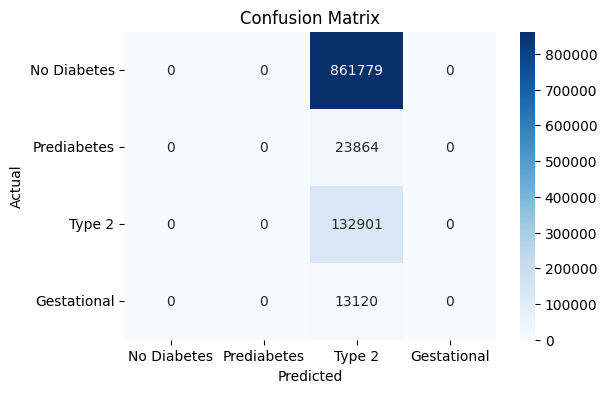

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

 No Diabetes       0.00      0.00      0.00    861779
 Prediabetes       0.00      0.00      0.00     23864
      Type 2       0.13      1.00      0.23    132901
 Gestational       0.00      0.00      0.00     13120

    accuracy                           0.13   1031664
   macro avg       0.03      0.25      0.06   1031664
weighted avg       0.02      0.13      0.03   1031664



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

'''
# Detect and initialize the TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.TPUStrategy(tpu)
    print('TPU detected and initialized.')
except ValueError:
    print('No TPU detected. Please ensure you are using a TPU-enabled runtime.')
'''

# Load a CSV file into a DataFrame
df = pd.read_csv('updated_CGM_Data_female.csv')

# Standardize features for the DL model
dl_features = ['Hora', 'Glucemia']

# Set the number of timesteps (sliding window)
window_size = 10

# Function to create sequences grouped by patient
def create_sequences_grouped_by_patient(df, window_size):
    X, y, patient_ids = [], [], []
    for patient_id, group in df.groupby('Patient_ID'):
        features = group[dl_features].values
        labels = group['Diabetes_Status'].values.astype(int)

        # Create sequences for each patient
        for i in range(len(features) - window_size):
            X.append(features[i:i + window_size])  # Features: 'Hora' and 'Glucemia'
            y.append(labels[i + window_size])      # Target: 'Diabetes_Status' after window
            patient_ids.append(patient_id)          # Keep track of patient ID
    return np.array(X), np.array(y), np.array(patient_ids)

# Prepare the data using the sliding window approach
X_dl, y_dl, patient_ids_dl = create_sequences_grouped_by_patient(df, window_size)

# Stratified split for train-test sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl, patient_ids_train, patient_ids_test = train_test_split(
    X_dl, y_dl, patient_ids_dl, test_size=0.2, stratify=y_dl, random_state=42
)
print("Extracted patient ids for train and test")

# Check the class distribution before applying class weights
print("Class distribution before applying class weights:")
unique, counts = np.unique(y_train_dl, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)

# Compute class weights using sklearn
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_dl),
    y=y_train_dl
)
class_weight_dict = dict(enumerate(class_weights))

# Print the computed class weights
print(f"Class weights: {class_weight_dict}")



# Adjusted batch size (larger for TPU)
batch_size = 128  # Larger batch size for performance on TPU
dl_features_count = X_train_dl.shape[2]  # Update this based on the number of features in X_train_dl

# Directory to save the best model
checkpoint_dir = 'model_checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Callbacks
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'best_dl_model_female.keras'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Prepare the dataset inside the TPU strategy scope
with tpu_strategy.scope():
    model = Sequential()
    model.add(Input(shape=(window_size, dl_features_count)))

    # First LSTM layer
    model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.6))

    # Second LSTM layer
    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.6))

    # Third LSTM layer
    model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.6))

    # Smaller Dense layer with regularization
    model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.02)))
    model.add(BatchNormalization())

    # Output layer for 4 classes
    model.add(Dense(units=4, activation='softmax'))

    # Compile with class weights
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # Shuffle, batch, prefetch for training data
    train_data = tf.data.Dataset.from_tensor_slices((X_train_dl, y_train_dl))
    train_data = train_data.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    # Shuffle, batch, prefetch for test data
    test_data = tf.data.Dataset.from_tensor_slices((X_test_dl, y_test_dl)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    # Train the model with the best hyperparameters
    history = model.fit(
      train_data,
      epochs=200,
      validation_data=test_data,
      class_weight=class_weight_dict,  # Apply class weights here
      callbacks=[early_stopping, reduce_lr, checkpoint_callback]
    )



# Make predictions using the best model
y_pred_probs = model.predict(X_test_dl)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test_dl  # Use the actual class labels directly

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Prediabetes', 'Type 2', 'Gestational'],
            yticklabels=['No Diabetes', 'Prediabetes', 'Type 2', 'Gestational'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for more metrics
print(classification_report(y_true, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Type 2', 'Gestational']))


In [ ]:
!pip install imbalanced-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 4.9 MB/s eta 0:00:00


Train XGBoost Model

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Load the dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('imputed_female_data_updated.csv')

# Drop the 'Patient_ID' column as it's not needed for training
df = df.drop(columns=['Patient_ID'])

# Define the feature columns and the target column
X = df.drop(columns=['Diabetes_Status'])  # Features (independent variables)
y = df['Diabetes_Status']  # Target (dependent variable)

# Split the data into train and test sets
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model for Female Dataset
xgb_model_female = xgb.XGBClassifier()

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote_female, y_train_smote_female = smote.fit_resample(X_train_female, y_train_female)

xgb_model_female.fit(X_train_smote_female, y_train_smote_female)

# Evaluate the model on the female test set
accuracy_female = xgb_model_female.score(X_test_female, y_test_female)
print("Female Dataset XGBoost Model Accuracy:", accuracy_female)


Female Dataset XGBoost Model Accuracy: 0.8155533010769471


In [ ]:
xgb_model_female.save_model('xgboost_female.bin')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:53] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load a CSV file into a DataFrame
df = pd.read_csv('/content/updated_CGM_Data_female.csv')

# Standardize features for the DL model
dl_features = ['Hora', 'Glucemia']

# Set the number of timesteps (sliding window)
window_size = 10

# Function to create sequences grouped by patient
def create_sequences_grouped_by_patient(df, window_size):
    X, y, patient_ids = [], [], []
    for patient_id, group in df.groupby('Patient_ID'):
        features = group[dl_features].values
        labels = group['Diabetes_Status'].values.astype(int)

        # Create sequences for each patient
        for i in range(len(features) - window_size):
            X.append(features[i:i + window_size])  # Features: 'Hora' and 'Glucemia'
            y.append(labels[i + window_size])      # Target: 'Diabetes_Status' after window
            patient_ids.append(patient_id)          # Keep track of patient ID
    return np.array(X), np.array(y), np.array(patient_ids)

# Prepare the data using the sliding window approach
X_dl, y_dl, patient_ids_dl = create_sequences_grouped_by_patient(df, window_size)

# Stratified split for train-test sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl, patient_ids_train, patient_ids_test = train_test_split(
    X_dl, y_dl, patient_ids_dl, test_size=0.2, stratify=y_dl, random_state=42
)
print("Extracted patient ids for train and test")

# Load the second dataset
df2 = pd.read_csv('/content/imputed_female_data_updated.csv')
X = df2.drop(columns=['Diabetes_Status', 'Patient_ID'], axis=1)
y = df2['Diabetes_Status']

# Step 1: Split the dataset into training and testing sets for XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

patient_ids_xgb_test = df2.loc[X_test_xgb.index, 'Patient_ID'].values

# Create a mapping of patient IDs to indices for the XGBoost test set
patient_id_to_index_xgb = {pid: idx for idx, pid in enumerate(patient_ids_xgb_test)}

# Check the unique patient IDs in both test sets
unique_patient_ids_dl = np.unique(patient_ids_test)
unique_patient_ids_xgb = np.unique(patient_ids_xgb_test)

# Find common patient IDs
common_patient_ids = np.intersect1d(unique_patient_ids_dl, unique_patient_ids_xgb)
print("Common Patient IDs:", common_patient_ids)

# Count the common IDs
print("Count of common Patient IDs:", len(common_patient_ids))

# Now align the test sets
# Initialize a set to keep track of added patient IDs
added_patient_ids = set()

# Lists to hold aligned sequences, labels, and patient IDs
aligned_sequences = []
aligned_labels = []
aligned_patient_ids = []

# Iterate through the deep learning test set
for i in range(len(patient_ids_test)):
    patient_id = patient_ids_test[i]

    # Check if the patient ID is in the XGBoost test set and hasn't been added yet
    if patient_id in patient_id_to_index_xgb and patient_id not in added_patient_ids:
        aligned_sequences.append(X_test_dl[i])  # Add the sequence
        aligned_labels.append(y_test_dl[i])      # Add the corresponding label
        aligned_patient_ids.append(patient_id)    # Add the patient ID
        added_patient_ids.add(patient_id)         # Mark this patient as added

# Convert aligned lists to arrays
X_test_dl_aligned = np.array(aligned_sequences)
y_test_dl_aligned = np.array(aligned_labels)
patient_ids_test_aligned = np.array(aligned_patient_ids)

# Check the new shapes
print("New shape of X_test_dl_aligned:", X_test_dl_aligned.shape)
print("Shape of X_test_xgb:", X_test_xgb.shape)

# Print unique patient IDs in both test sets
print("Unique Patient IDs in DL Test Set:", np.unique(patient_ids_test))
print("Unique Patient IDs in XGBoost Test Set:", np.unique(patient_ids_xgb_test))

# Print counts of samples in both sets before assertion
print("Count of aligned sequences (DL):", X_test_dl_aligned.shape[0])
print("Count of XGBoost test set:", X_test_xgb.shape[0])

# Create a mask for the XGBoost test set to keep only matching patient IDs
mask = np.isin(patient_ids_xgb_test, patient_ids_test_aligned)

# Filter the XGBoost test set
X_test_xgb_filtered = X_test_xgb[mask]
y_test_xgb_filtered = y_test_xgb[mask]
patient_ids_xgb_filtered = patient_ids_xgb_test[mask]

# Check the shapes of the filtered sets
print("Filtered X_test_xgb shape:", X_test_xgb_filtered.shape)
print("Filtered y_test_xgb shape:", y_test_xgb_filtered.shape)

# Assert that the new shape of aligned deep learning test set matches filtered XGBoost test set
assert X_test_dl_aligned.shape[0] == X_test_xgb_filtered.shape[0], "Mismatch in sample counts after alignment"

# Print the filtered patient IDs to verify
print("Filtered Patient IDs in XGBoost Test Set:", patient_ids_xgb_filtered)

# Class distribution for the DL test set
unique_classes_dl, counts_dl = np.unique(y_test_dl_aligned, return_counts=True)
class_distribution_dl = dict(zip(unique_classes_dl, counts_dl))

# Class distribution for the XGBoost filtered test set
unique_classes_xgb, counts_xgb = np.unique(y_test_xgb_filtered, return_counts=True)
class_distribution_xgb = dict(zip(unique_classes_xgb, counts_xgb))

# Print the class distributions
print("Class distribution in DL test set:", class_distribution_dl)
print("Class distribution in XGBoost filtered test set:", class_distribution_xgb)


Extracted patient ids for train and test
Common Patient IDs: [     1      4      7 ... 128126 128127 128133]
Count of common Patient IDs: 25621
New shape of X_test_dl_aligned: (25621, 10, 2)
Shape of X_test_xgb: (25628, 10)
Unique Patient IDs in DL Test Set: [     1      2      3 ... 128134 128135 128136]
Unique Patient IDs in XGBoost Test Set: [     1      4      7 ... 128126 128127 128133]
Count of aligned sequences (DL): 25621
Count of XGBoost test set: 25628
Filtered X_test_xgb shape: (25621, 10)
Filtered y_test_xgb shape: (25621,)
Filtered Patient IDs in XGBoost Test Set: [ 92565  98384  13177 ... 103971 120831 102322]
Class distribution in DL test set: {0: 21536, 1: 563, 2: 3201, 3: 321}
Class distribution in XGBoost filtered test set: {0.0: 21536, 1.0: 563, 2.0: 3201, 3.0: 321}


In [ ]:
print(X_test_dl_aligned.shape)
print(X_test_xgb_filtered.shape)
print(y_test_dl_aligned.shape)
print(y_test_xgb_filtered.shape)

(25621, 10, 2)
(25621, 10)
(25621,)
(25621,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
import tensorflow as tf
import joblib

# Load models
model_dl = tf.keras.models.load_model('/content/best_dl_model_female.keras')
model_xgb = xgb.XGBClassifier()
model_xgb.load_model('/content/xgboost_female.bin')

# Make predictions using the models
y_pred_dl = model_dl.predict(X_test_dl_aligned)  # Outputs class labels
y_pred_xgb = model_xgb.predict_proba(X_test_xgb_filtered)  # XGBoost probability outputs

# If y_pred_dl gives you class labels (0, 1, 2, 3), convert it to probabilities
y_pred_dl_probs = tf.nn.softmax(y_pred_dl).numpy()

# Prepare the features for the stacking model
X_stacked = np.column_stack((y_pred_dl_probs, y_pred_xgb))

# Define the stacking models to try
stacking_models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVC': SVC(probability=True)
}

# Initialize a dictionary to store accuracies
accuracy_results = {}

# Iterate through the models
for model_name, model in stacking_models.items():
    # Fit the stacking model
    model.fit(X_stacked, y_test_dl_aligned)  # or y_test_xgb_filtered, they should be the same

    # Make predictions using the stacking model
    final_predictions = model.predict(X_stacked)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_dl_aligned, final_predictions)
    accuracy_results[model_name] = accuracy

    # Optionally, save the model
    joblib.dump(model, f'{model_name.replace(" ", "_").lower()}_stacked_model.pkl')

# Display the results
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Find the best model based on accuracy
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model_accuracy = accuracy_results[best_model_name]
print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


801/801 [==============================] - 10s 9ms/step
Logistic Regression Accuracy: 0.8406
Random Forest Accuracy: 1.0000
Gradient Boosting Accuracy: 0.8433
SVC Accuracy: 0.8406
Best Model: Random Forest with Accuracy: 1.0000


Male Model

In [ ]:
# load imputed_male_data.csv and merged_CGM_clinical_data.csv
import pandas as pd

structured_data = pd.read_csv('/content/imputed_male_data.csv')
def find_median(a, b):
    return (a + b) / 2


# mapping formed by _AGEG5YR chart in this pdf: https://www.cdc.gov/brfss/annual_data/2020/pdf/codebook20_llcp-v2-508.pdf

structured_data_age_mapping = {
    1: find_median(18, 24),
    2: find_median(25, 29),
    3: find_median(30, 34),
    4: find_median(35, 39),
    5: find_median(40, 44),
    6: find_median(45, 49),
    7: find_median(50, 54),
    8: find_median(55, 59),
    9: find_median(60, 64),
    10: find_median(65, 69),
    11: find_median(70, 74),
    12: find_median(75, 79),
    13: 80
}

# Replace using the mapping without affecting other entries
structured_data['Age'] = structured_data['Age'].replace(structured_data_age_mapping)

# save dataframe to csv
structured_data.to_csv('imputed_male_data.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

cgm_data = pd.read_csv('/content/merged_CGM_clinical_data.csv')

# Print head of CGM_data
print(cgm_data.head())

# Remove every column besides "Hora", "Glucemia", and "T2DM". Make sure to only include the female samples (gender = 0)
cgm_data = cgm_data[cgm_data["gender"] == 1]
cgm_data = cgm_data[["Patient_ID", "Hora", "Glucemia", "T2DM"]]

# Label encode T2DM: 0 - False, 1 - True
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cgm_data["T2DM"] = encoder.fit_transform(cgm_data["T2DM"])

cgm_data = cgm_data.rename(columns={"T2DM": "Diabetes_Status"})

# Preprocess data
cgm_data['Hora'] = pd.to_timedelta(cgm_data['Hora']).dt.total_seconds()
cgm_data = cgm_data.dropna()

# Define numerical columns
numerical_columns = ['Hora', 'Glucemia']

# Normalize numerical columns
scaler = MinMaxScaler()
cgm_data[numerical_columns] = scaler.fit_transform(cgm_data[numerical_columns])

diabetes_status_mapping = {
    0: 0,
    1: 2
}

# Map the values in the 'Diabetes_Status' column
cgm_data['Diabetes_Status'] = cgm_data['Diabetes_Status'].map(diabetes_status_mapping)

# Handle class imbalance by oversampling the minority class
from sklearn.utils import resample
minority_class = cgm_data[cgm_data['Diabetes_Status'] == 2]
majority_class = cgm_data[cgm_data['Diabetes_Status'] == 0]

minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
balanced_data = pd.concat([majority_class, minority_upsampled])

balanced_data_csv = balanced_data.to_csv('cgm_data_male.csv')

   Patient_ID      Hora  Glucemia  gender  age   BMI  glycaemia  HbA1c  \
0           1  00:00:00      87.0       1   77  25.4        106    6.3   
1           1  00:00:03      95.0       1   77  25.4        106    6.3   
2           1  00:00:05     104.0       1   77  25.4        106    6.3   
3           1  00:00:06     159.0       1   77  25.4        106    6.3   
4           1  00:00:07     114.0       1   77  25.4        106    6.3   

   follow.up   T2DM  
0      413.0  False  
1      413.0  False  
2      413.0  False  
3      413.0  False  
4      413.0  False  


In [ ]:
import joblib
# Save the scaler to a file
joblib.dump(scaler, 'minmax_scaler.pkl')

['minmax_scaler.pkl']

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/cgm_data_male.csv')

patient_id_value_counts = df['Patient_ID'].value_counts()
print(patient_id_value_counts)

Patient_ID
195    3545
121    3477
86     3416
31     3389
28     3327
       ... 
141     204
147     204
154     203
158     203
152     203
Name: count, Length: 105, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import concurrent.futures

# Load data
cgm_data_male = pd.read_csv('/content/cgm_data_male.csv')
structured_data_male = pd.read_csv('/content/imputed_male_data.csv')

# Get existing Patient_IDs
existing_ids_cgm = set(cgm_data_male['Patient_ID'].unique())

# Define the range of possible Patient_IDs
min_id = 1
max_id = 113524

# Function to generate a unique Patient_IDs in a batch by incrementing by 1
def generate_sequential_patient_ids(starting_id, num_ids):
    return list(range(starting_id, starting_id + num_ids))

# Function to generate multiple unique Patient_IDs in parallel
def generate_unique_patient_ids_parallel(num_ids, existing_ids):
    unique_ids = set()
    next_id = min(set(range(min_id, max_id + 1)) - existing_ids)  # Start from the first available ID
    batch_size = 1000  # Number of IDs to generate in each batch

    print(f"Starting the generation of {num_ids} unique Patient_IDs.")

    while len(unique_ids) < num_ids:
        remaining_ids = num_ids - len(unique_ids)
        current_batch_size = min(batch_size, remaining_ids)

        with concurrent.futures.ThreadPoolExecutor() as executor:
            # Submit a batch job to generate sequential IDs
            future = executor.submit(generate_sequential_patient_ids, next_id, current_batch_size)
            new_ids = future.result()

            # Add the new IDs to the unique_ids set
            for new_id in new_ids:
                if new_id not in existing_ids and new_id not in unique_ids:
                    unique_ids.add(new_id)
                    print(f"Added unique Patient_ID: {new_id} (Total unique IDs now: {len(unique_ids)})")

            next_id = max(new_ids) + 1  # Update next_id to start from the next number

    print(f"Completed generating Patient_IDs. Total unique IDs generated: {len(unique_ids)}")
    return list(unique_ids)

# Generate new Patient_IDs
num_entries_structured = len(structured_data_male)
new_patient_ids = generate_unique_patient_ids_parallel(num_entries_structured, existing_ids_cgm)

# Assign new Patient_IDs to the structured_data_male DataFrame
structured_data_male['Patient_ID'] = new_patient_ids

print(structured_data_male)


Streaming output truncated to the last 5000 lines.
Added unique Patient_ID: 108658 (Total unique IDs now: 108553)
Added unique Patient_ID: 108659 (Total unique IDs now: 108554)
Added unique Patient_ID: 108660 (Total unique IDs now: 108555)
Added unique Patient_ID: 108661 (Total unique IDs now: 108556)
Added unique Patient_ID: 108662 (Total unique IDs now: 108557)
Added unique Patient_ID: 108663 (Total unique IDs now: 108558)
Added unique Patient_ID: 108664 (Total unique IDs now: 108559)
Added unique Patient_ID: 108665 (Total unique IDs now: 108560)
Added unique Patient_ID: 108666 (Total unique IDs now: 108561)
Added unique Patient_ID: 108667 (Total unique IDs now: 108562)
Added unique Patient_ID: 108668 (Total unique IDs now: 108563)
Added unique Patient_ID: 108669 (Total unique IDs now: 108564)
Added unique Patient_ID: 108670 (Total unique IDs now: 108565)
Added unique Patient_ID: 108671 (Total unique IDs now: 108566)
Added unique Patient_ID: 108672 (Total unique IDs now: 108567)
Adde

In [ ]:
structured_data_male.to_csv('imputed_male_data_updated.csv', index=False)

In [ ]:
# prompt: I want to add the new ids (just the new rows in column of Patient_IDs) and their corresponding Diabetes_Status that were just added to the structured_data_male to cgm_data_male.

# Assuming 'structured_data_male' and 'cgm_data_male' are your DataFrames
# and you have just updated 'structured_data_male' with new rows

# Get the new rows from structured_data_male
new_rows = structured_data_male[~structured_data_male['Patient_ID'].isin(cgm_data_male['Patient_ID'])]

# Extract the 'Patient_ID' and 'Diabetes_Status' from the new rows
new_patient_ids = new_rows['Patient_ID'].tolist()
new_diabetes_status = new_rows['Diabetes_Status'].tolist()

# Create a new DataFrame for the new data
new_data = pd.DataFrame({'Patient_ID': new_patient_ids, 'Diabetes_Status': new_diabetes_status})

# Append the new data to the cgm_data_male DataFrame
cgm_data_male = pd.concat([cgm_data_male, new_data], ignore_index=True)

cgm_data_male = cgm_data_male.drop("Unnamed: 0", axis=1)

# Optionally, save the updated DataFrame
cgm_data_male.to_csv('cgm_data_male_updated.csv', index=False)

print("New Patient IDs and their Diabetes Status have been added to cgm_data_male.")

New Patient IDs and their Diabetes Status have been added to cgm_data_male.


In [ ]:
import pandas as pd

# Assuming cgm_data_male and structured_data_male DataFrames are already loaded

# Step 1: Identify rows in cgm_data_male where Patient_ID is not in structured_data_male
new_rows = cgm_data_male.loc[~cgm_data_male['Patient_ID'].isin(structured_data_male['Patient_ID']), ['Patient_ID', 'Diabetes_Status']]

# Step 2: Drop duplicates to ensure unique Patient_IDs
new_rows = new_rows.drop_duplicates(subset='Patient_ID')

# Step 3: Concatenate the new rows to structured_data_male
structured_data_male = pd.concat([structured_data_male, new_rows], ignore_index=True)

# Print to verify the updated DataFrame
print(structured_data_male)


         Age  HighBP  PhysicallyActive   BMI  Smoking  Sleep  SoundSleep  \
0       54.0     1.0               3.0  39.0      0.0    8.0         6.0   
1       54.0     1.0               0.0  28.0      0.0    8.0         6.0   
2       44.0     0.0               3.0  24.0      0.0    6.0         6.0   
3       54.0     0.0               3.0  23.0      0.0    8.0         6.0   
4       44.0     0.0               0.0  27.0      0.0    8.0         8.0   
...      ...     ...               ...   ...      ...    ...         ...   
113624   NaN     NaN               NaN   NaN      NaN    NaN         NaN   
113625   NaN     NaN               NaN   NaN      NaN    NaN         NaN   
113626   NaN     NaN               NaN   NaN      NaN    NaN         NaN   
113627   NaN     NaN               NaN   NaN      NaN    NaN         NaN   
113628   NaN     NaN               NaN   NaN      NaN    NaN         NaN   

        RegularMedicine  Stress  BPLevel  Diabetes_Status  Patient_ID  
0              

In [ ]:
structured_data_male.to_csv('imputed_male_data_updated.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

# load imputed_male_updated.csv and cgm_data_male_updated.csv
structured_data_male = pd.read_csv('/content/imputed_male_data_updated.csv')
cgm_data_male = pd.read_csv('/content/cgm_data_male_updated.csv')



# Impute missing values in structured_data_male
categorical_cols_structured = ['HighBP', 'PhysicallyActive', 'Smoking', 'Sleep', 'SoundSleep', 'RegularMedicine', 'Stress', 'BPLevel']
numerical_cols_structured = ['Age', 'BMI']  # Only 'Age' and 'BMI' are numerical

# Create a SimpleImputer for categorical features (using most_frequent strategy)
imputer_categorical = SimpleImputer(strategy='most_frequent')
structured_data_male[categorical_cols_structured] = imputer_categorical.fit_transform(structured_data_male[categorical_cols_structured])

# Create a KNNImputer for numerical features
imputer_numerical = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed
structured_data_male[numerical_cols_structured] = imputer_numerical.fit_transform(structured_data_male[numerical_cols_structured])
imputed_values = imputer_numerical.fit_transform(structured_data_male[numerical_cols_structured])

# Step 4: Add randomness to the imputed values for diversity
# Here we add a small random noise (e.g., drawn from a normal distribution)
random_noise = np.random.normal(0, 0.1, imputed_values.shape)  # Adjust the standard deviation as needed
structured_data_male[numerical_cols_structured] = imputed_values + random_noise

# Round BMI to nearest tenth and Age to nearest whole number
structured_data_male['BMI'] = structured_data_male['BMI'].round(1)  # Round BMI to 1 decimal place
structured_data_male['Age'] = structured_data_male['Age'].round(0).astype(int)  # Round Age to nearest whole number

# save to csv file
structured_data_male.to_csv('imputed_male_data_updated_final.csv', index=False)


In [ ]:
import pandas as pd

# Load the DataFrame
cgm_data_male = pd.read_csv('/content/cgm_data_male_updated.csv')

# Define the number of times to duplicate rows with NaN values
duplicate_count = 50

# Step 1: Identify rows with NaN values in 'Hora' and/or 'Glucemia'
nan_rows = cgm_data_male[cgm_data_male[['Hora', 'Glucemia']].isna().any(axis=1)]

# Step 2: Include rows with a single instance of Patient_ID
# Find all unique Patient_IDs with only one entry
single_instance_patient_ids = cgm_data_male['Patient_ID'].value_counts()[cgm_data_male['Patient_ID'].value_counts() == 1].index

# Include rows with these single-instance Patient_IDs in the NaN rows
nan_rows = pd.concat([nan_rows, cgm_data_male[cgm_data_male['Patient_ID'].isin(single_instance_patient_ids)]], ignore_index=True)

# Check how many NaN rows were found
print(f"Number of rows with NaN values or single instance Patient_IDs: {nan_rows.shape[0]}")

# Step 3: Duplicate the identified rows if any exist
if not nan_rows.empty:
    duplicated_nan_rows = pd.concat([nan_rows] * duplicate_count, ignore_index=True)

    # Step 4: Combine the original DataFrame with the duplicated rows
    cgm_data_male = pd.concat([cgm_data_male, duplicated_nan_rows], ignore_index=True)
else:
    print("No rows with NaN values found. No duplication performed.")

# Save to temporary CSV file
cgm_data_male.to_csv('cgm_data_male_temp.csv', index=False)

# Print the resulting DataFrame shape
print(f"Updated DataFrame shape: {cgm_data_male.shape}")


Number of rows with NaN values or single instance Patient_IDs: 227048
Updated DataFrame shape: (11506884, 4)


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from joblib import Parallel, delayed

# Load the DataFrame
cgm_data_male = pd.read_csv('cgm_data_male_temp.csv')

# Sort the DataFrame by Patient_ID and Hora
cgm_data_male = cgm_data_male.sort_values(['Patient_ID', 'Hora'])

# Define the columns to impute (Hora and Glucemia)
columns_to_impute = ['Hora', 'Glucemia']

# Split data into smaller chunks to parallelize the imputation
def knn_impute_chunk(chunk):
    imputer = KNNImputer(n_neighbors=10)  # You can adjust n_neighbors as needed
    chunk[columns_to_impute] = imputer.fit_transform(chunk[columns_to_impute])
    return chunk

# Define number of chunks to process in parallel (adjust based on your CPU cores)
num_chunks = 16 # Adjust according to your system
chunks = np.array_split(cgm_data_male, num_chunks)

# Use Joblib to process the chunks in parallel
imputed_chunks = Parallel(n_jobs=num_chunks)(delayed(knn_impute_chunk)(chunk) for chunk in chunks)

# Combine the imputed chunks back into a single DataFrame
cgm_data_male_imputed = pd.concat(imputed_chunks)

# Save the imputed DataFrame
cgm_data_male_imputed.to_csv('cgm_data_male_imputed.csv', index=False)


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pandas as pd

structured_male_data = pd.read_csv('/content/imputed_male_data_updated_final.csv')

class_distribution = structured_male_data['Diabetes_Status'].value_counts()
print("==== Class Distribution ====")
print(class_distribution)

X = structured_male_data.drop(['Patient_ID', 'Diabetes_Status'], axis=1)
y = structured_male_data['Diabetes_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# fit xgboost model with SMOTE data

# Initialize and train the XGBoost model for Female Dataset
xgb_model_male = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model_male.fit(X_train_resampled, y_train_resampled)

# print out classification report and accuracy
y_pred_xgb_male = xgb_model_male.predict(X_test)
print(classification_report(y_test, y_pred_xgb_male))







==== Class Distribution ====
Diabetes_Status
0.0    93357
2.0    17622
1.0     2650
Name: count, dtype: int64
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     18732
         1.0       0.28      0.40      0.33       577
         2.0       0.81      0.95      0.88      3417

    accuracy                           0.93     22726
   macro avg       0.69      0.76      0.72     22726
weighted avg       0.94      0.93      0.93     22726



In [ ]:
# save xgboost male
xgb_model_male.save_model('xgboost_male.bin')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:50:35] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
